Complete the following tasks:

Choose a corpus of interest.
How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
Taking the most common words, how many unique words represent half of the total words in the corpus?
Identify the 200 highest frequency words in this corpus.
Create a graph that shows the relative frequency of these 200 words.
Does the observed relative frequency of these words follow Zipf’s law? Explain.
In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [40]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 23 15:32:00 2020

@author: ASchwenker
"""
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd

nltk.download('all')
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\aschwenker\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\aschwenker\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\aschwenker\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\aschwenker\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\aschwenker\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_

In [42]:
#How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

alice = [w for w in alice if w.isalpha()]
alice = [w for w in alice if w not in stopwords.words('english')]
unique = set(alice)
len(unique)
len(alice)

13945

In [43]:
#Taking the most common words, how many unique words represent half of the total words in the corpus?
common = nltk.FreqDist(alice).most_common()
print(common[:5])
print((len(alice)/2))
def while11(nums,maxi):
    i = 0
    total = 0
    while total <= maxi:
        total += nums[i]
        i += 1
    return total
half_words=0
unique_half_words = []
j=0
for tup in common:
    i = tup[1]
    j = j+1
    k = tup[0]
    if half_words <= (len(alice)/2):
        half_words = half_words+i
        unique_half_words.append(k)
unique_half = len(set(unique_half_words))
print(half_words," instances of the most common unique words represent half the total words", "this is ", unique_half," unique words")    


[('I', 543), ('said', 456), ('Alice', 396), ('little', 125), ('The', 108)]
6972.5
6985  instances of the most common unique words represent half the total words this is  185  unique words


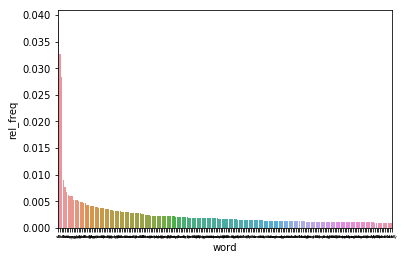

In [48]:
#Create a graph that shows the relative frequency of these 200 words.
freq = nltk.FreqDist(alice)
top_200_graph = pd.DataFrame(freq.most_common(200),columns=['word','count'])

top_200_graph['rel_freq'] = top_200_graph['count']/float(len(alice))
top_200_graph.head(10)

g = sns.barplot(x=top_200_graph.word, y=top_200_graph.rel_freq)


Does the observed relative frequency of these words follow Zipf’s law? Explain.

"Zipf’s Law describes a probability distribution where each frequency is the reciprocal of its rank multiplied by the highest frequency. Therefore the second highest frequency is the highest multiplied by 1/2, the third highest is the highest multiplied by 1/3 and so on." - https://medium.com/explorations-in-python/zipfs-law-in-python-947b1ae52cf1

based on the shape of the graph this frequency roughly follows the shape, but doesn't exactly follow the law